In [108]:
import numpy as np
import pandas as pd
import os 
!pip install matplotlib
import matplotlib.pyplot as plt            


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### merge all the months


In [109]:
files = [file for file in os.listdir('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]
all_months = pd.DataFrame()
for file in files:
    df = pd.read_csv("Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months=pd.concat([all_months,df])
all_months.to_csv('All Data',index=False)

### find the null valus and delete the not sense date value


In [110]:
all_data =pd.read_csv('All Data')
all_data.dtypes
all_data = all_data.dropna(how='all')
all_data = all_data.reset_index(drop=True)
all_data = all_data[all_data['Order Date'] != 'Order Date'].reset_index(drop=True)

### specify the date format to avoid big data load

In [111]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_1088\4061391744.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')


### add month column

In [112]:
all_data['Month'] = all_data['Order Date'].dt.month
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### to answer our first question , What is the best month order ? we need to create new column for sales

In [113]:
# first all our columns are string type so we need to convert them
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
dtype: object

### create sales column 

In [114]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
dtype: object

### Q1 What was the best month for sales? How much was earned that month ?

In [115]:
result1 = all_data.groupby('Month')['Sales'].sum()
result1

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

### PLOT 

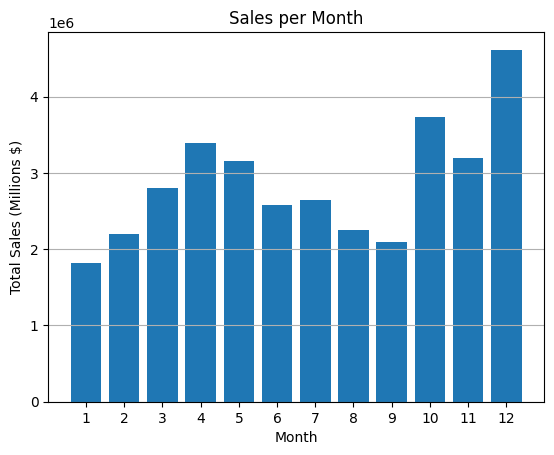

In [116]:
months = range(1,13)
plt.bar(months, result1)
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Total Sales (Millions $)")
plt.title("Sales per Month")
plt.grid(axis='y')
plt.show()

### What city sold the most product?

In [117]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [118]:
# first we need to extract city name from Purchase Address
# then we need to add the state to the city because there is duplicate in city names in difrrent states
part = all_data['Purchase Address']
city = [] 
for i in part :
    city.append(i.split(',')[1]+' '+i.split(',')[2].split(' ')[1])
all_data['City'] = city
#................
result2 = all_data.groupby('City')['Sales'].sum()
result2


City
Atlanta GA          2795498.58
Austin TX           1819581.75
Boston MA           3661642.01
Dallas TX           2767975.40
Los Angeles CA      5452570.80
New York City NY    4664317.43
Portland ME          449758.27
Portland OR         1870732.34
San Francisco CA    8262203.91
Seattle WA          2747755.48
Name: Sales, dtype: float64

In [119]:
# another easier way is to use apply 
part = all_data['Purchase Address']
all_data['Purchase Address'].apply(lambda x:x.split(',')[1]+' '+x.split(',')[2].split(' ')[1])

0                 Dallas TX
1                 Boston MA
2            Los Angeles CA
3            Los Angeles CA
4            Los Angeles CA
                ...        
185945       Los Angeles CA
185946     San Francisco CA
185947     San Francisco CA
185948     San Francisco CA
185949     San Francisco CA
Name: Purchase Address, Length: 185950, dtype: object

### plot

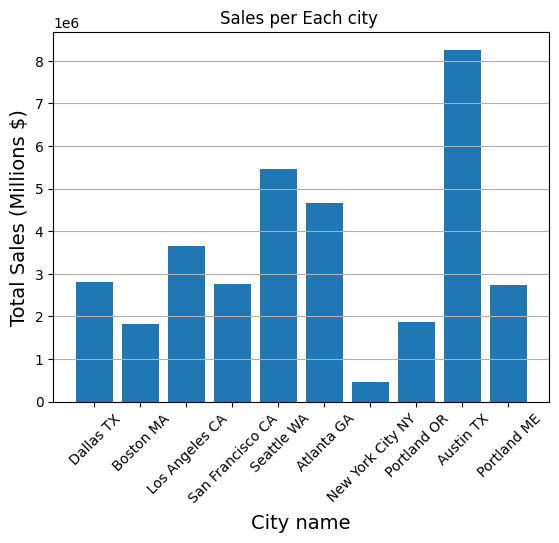

In [120]:
# if i use this method , false values will happen 
#because the oder in y axis diffrent in the order in x axis so i need to use the other cell method
city_name = all_data['City'].unique()
plt.bar(city_name,result2)
plt.xticks(rotation=45)
plt.xlabel("City name", fontsize=14)
plt.ylabel("Total Sales (Millions $)",fontsize=14)
plt.title("Sales per Each city ")
plt.grid(axis='y')


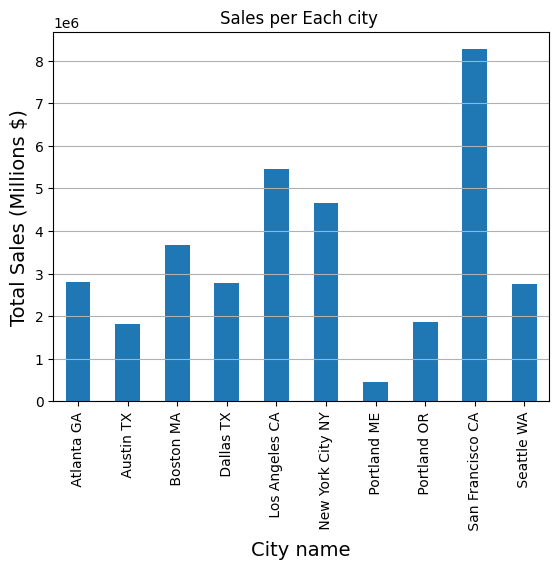

In [121]:
# the correct way 
result2.plot(kind='bar')
plt.xlabel("City name", fontsize=14)
plt.ylabel("Total Sales (Millions $)",fontsize=14)
plt.title("Sales per Each city ")
plt.grid(axis='y')
plt.show()

In [122]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [123]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [124]:
result3 = all_data.groupby('Hour')['Sales'].count()
result3


Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

# plot 


Text(0.5, 1.0, 'Sales per Hour')

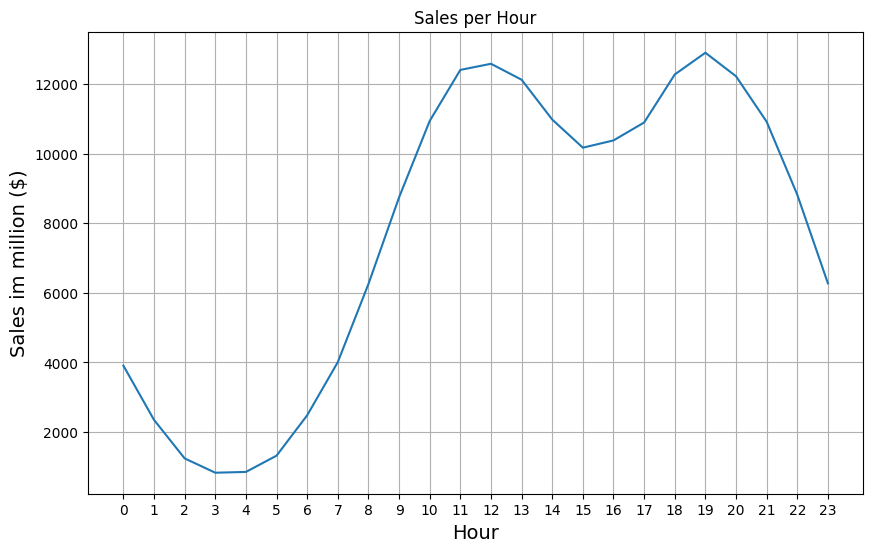

In [125]:
plt.figure(figsize=(10, 6))
result3.plot(kind='line')
plt.grid(True)
plt.xticks(range(0,24))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Sales im million ($)', fontsize=14)
plt.title('Sales per Hour')



In [126]:
# so my recomindation as about 11AM or 7PM   ( THOSE ARE THE PEAK POINTS )

In [127]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [128]:
# to join all the product with the same id togethor 
from itertools import combinations
from collections import Counter
order_products = all_data.groupby('Order ID')['Product'].agg(lambda x: ', '.join(x)).reset_index()
product_combinations = []
# Convert the product string into a list of product combinations
for products in order_products['Product']:
    product_list = products.split(', ')
    product_combinations.extend(combinations(sorted(product_list), 2))
# Count occurrences of each product pair
pair_counts = Counter(product_combinations)
# Get the top 2 most common product pairs
top_2_pairs = pair_counts.most_common(2)
print(top_2_pairs)




[(('Lightning Charging Cable', 'iPhone'), 1015), (('Google Phone', 'USB-C Charging Cable'), 999)]


### What product sold the most? Why do you think it sold the most?


<Axes: xlabel='Product'>

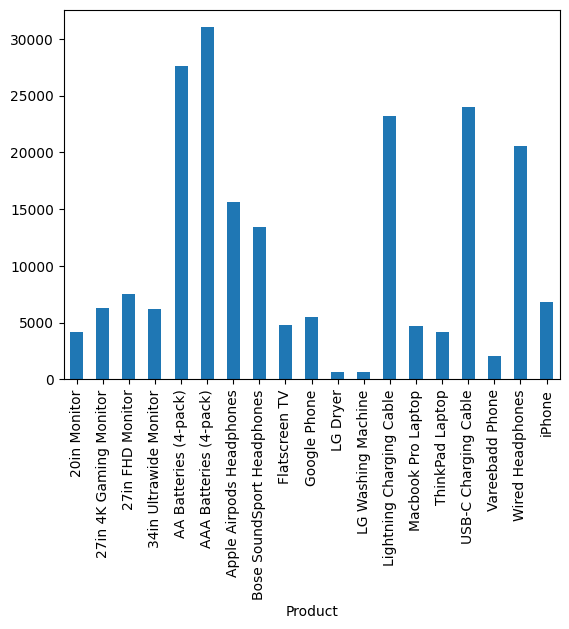

In [129]:
all_data.head()
result5 = all_data.groupby('Product')['Quantity Ordered'].sum()
result5.plot(kind='bar')


In [130]:
# our hypothisis is that the most sold item is the items that has cheapest price 
# so we need to prove this 
result6 = all_data[['Product', 'Price Each']].drop_duplicates().sort_values(by='Price Each',ascending=True).reset_index(drop=True)
result6
# so our hypothisis is correct 

,Product,Price Each
0,AAA Batteries (4-pack),2.99
1,AA Batteries (4-pack),3.84
2,USB-C Charging Cable,11.95
3,Wired Headphones,11.99
4,Lightning Charging Cable,14.95
5,Bose SoundSport Headphones,99.99
6,20in Monitor,109.99
7,27in FHD Monitor,149.99
8,Apple Airpods Headphones,150.00
9,Flatscreen TV,300.00


In [136]:
all_data.to_csv('All Data4',index=False,sep=',')